<a href="https://colab.research.google.com/github/SJhawar1010/Speech-Processing/blob/main/Satyam_554_SPR_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
states = ["/h/", "/e/", "/l/", "/o/"]
observations = ["O1", "O2", "O3", "O4"]
obsseq = [0, 1, 2, 3]

In [33]:
startp = np.array([1.0, 0.0, 0.0, 0.0])
tmatrix = np.array([
    [0.0, 0.7, 0.3, 0.0],
    [0.0, 0.2, 0.6, 0.2],
    [0.0, 0.0, 0.3, 0.7],
    [0.0, 0.0, 0.1, 0.9]
])
emmmatrix = np.array([
    [0.6, 0.2, 0.1, 0.1],
    [0.1, 0.7, 0.1, 0.1],
    [0.1, 0.1, 0.6, 0.2],
    [0.2, 0.1, 0.2, 0.5]
])

In [34]:
statesnum = len(states)
obsnum = len(obsseq)

In [35]:
viterbit = np.zeros((statesnum, obsnum))
paths = np.zeros((statesnum, obsnum), dtype=int)

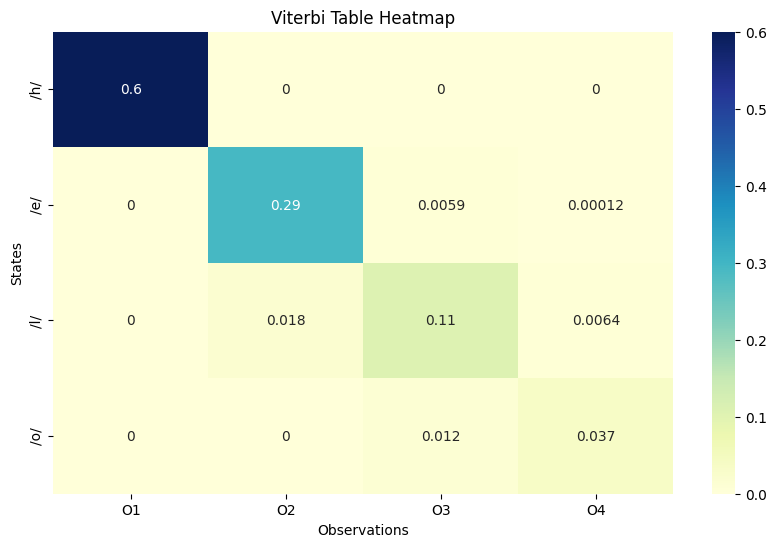

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(viterbit, annot=True, cmap="YlGnBu", xticklabels=observations, yticklabels=states)
plt.title("Viterbi Table Heatmap")
plt.xlabel("Observations")
plt.ylabel("States")
plt.show()

In [37]:
for s in range(statesnum):
    viterbit[s, 0] = startp[s] * emmmatrix[s, obsseq[0]]
    paths[s, 0] = 0

In [38]:
for t in range(1, obsnum):
    for s in range(statesnum):
        probabilities = [
            viterbit[prev_state, t - 1] * tmatrix[prev_state, s] * emmmatrix[s, obsseq[t]]
            for prev_state in range(statesnum)
        ]
        viterbit[s, t] = max(probabilities)
        paths[s, t] = np.argmax(probabilities)

In [39]:
MLSeq = np.zeros(obsnum, dtype=int)
MLSeq[-1] = np.argmax(viterbit[:, -1])

In [40]:
for t in range(obsnum - 2, -1, -1):
    MLSeq[t] = paths[MLSeq[t + 1], t + 1]

In [41]:
probability = np.max(viterbit[:, -1])

In [42]:
DecSeq = [states[state] for state in MLSeq]

In [43]:
print("Most likely sequence of states:", DecSeq)
print("Probability of the most likely sequence:", probability)

Most likely sequence of states: ['/h/', '/e/', '/l/', '/o/']
Probability of the most likely sequence: 0.03704399999999999


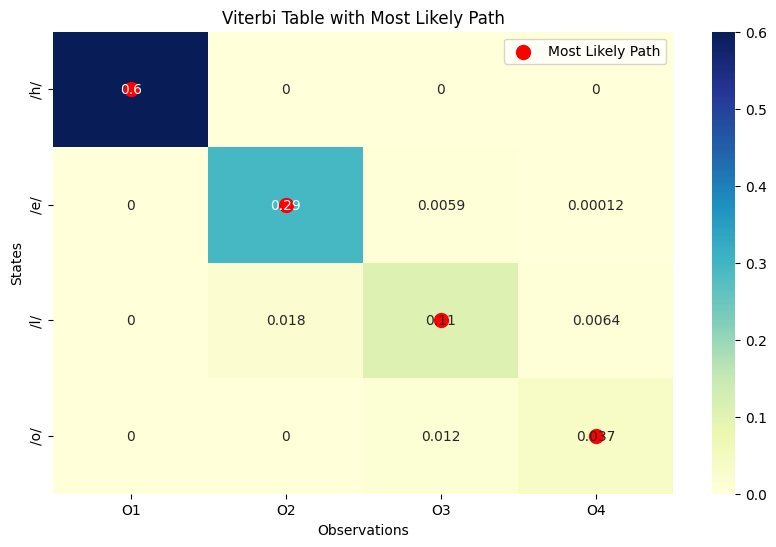

In [44]:
plt.figure(figsize=(10, 6))
sns.heatmap(viterbit, annot=True, cmap="YlGnBu", xticklabels=observations, yticklabels=states)
for t in range(obsnum):
    plt.scatter(t + 0.5, MLSeq[t] + 0.5, color="red", s=100, label="Most Likely Path" if t == 0 else "")

plt.title("Viterbi Table with Most Likely Path")
plt.xlabel("Observations")
plt.ylabel("States")
plt.legend()
plt.show()